# Advanced Linear Models

In general, linear models are fit by minimizing a loss function. This function will be a function of the $\beta$ coefficients for each feature. The best set of $\beta$ values is the set that gives the smallest value of the loss function. 

The most common loss function is 

$$\mathcal{L}(\beta) = \sum_{i=1}^n \left(y - \widehat{y}\right)^2 = (y-X\beta)^T(y-X\beta)$$

Generally speaking, this equation is a second-degree polynomial or quadratic. 

If we had one feature, then we would be seeking the best line

$$\widehat{f} = \beta_0 + \beta_1x$$

The loss $\mathcal{L}$ as a function of $\beta_1$ would be the familiar parabola

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0,0.5,'$\\mathcal{L}$')

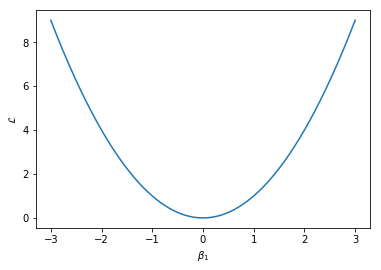

In [2]:
bbeta = np.linspace(-3,3,1000)
lloss = bbeta**2
plt.plot(bbeta, lloss)
plt.xlabel('$\\beta_1$')
plt.ylabel('$\\mathcal{L}$')

If we were to plot the loss versus $\beta_0$ and $\beta_1$, it would be a 3-D paraboloid where the height of the paraboloid is the associated loss $\mathcal{L}$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Paraboloid_of_Revolution.svg/512px-Paraboloid_of_Revolution.svg.png" width=200px>

This would generalize to higher dimensions. The important thing is that there is always a single **global** minimum i.e. *the loss function is convex*.

### Finding a Minimum

Given a parabol(oid), we can find the minimum using calculus. Recall that the derivative of a function represents the rate of change (slope) of the function at a given point.

Text(0,0.5,'$\\mathcal{L}$')

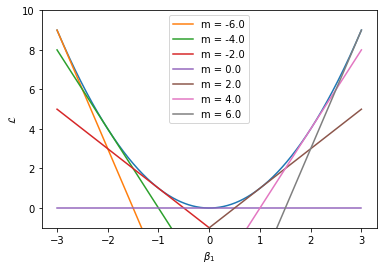

In [8]:
bbeta = np.linspace(-3,3,1000)
lloss = bbeta**2

test_points = np.linspace(-3,3,7)
slopes = 2*test_points
losses = test_points**2

slope_line = lambda m, x, x1, y1: m*(x - x1) + y1
plt.plot(bbeta, lloss)
for m, x1, y1 in zip(slopes, test_points, losses):
    plt.plot(bbeta, slope_line(m, bbeta, x1, y1), label='m = {}'.format(m))
plt.ylim(-1, 10)
plt.legend()
plt.xlabel('$\\beta_1$')
plt.ylabel('$\\mathcal{L}$')

Using Calculus, we can find the minimum of our loss function by finding where the slope is zero. In other words, we can find the minimum of the loss function by finding where the derivative of the loss function is zero.

## How Logistic Regression is a Linear Model

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

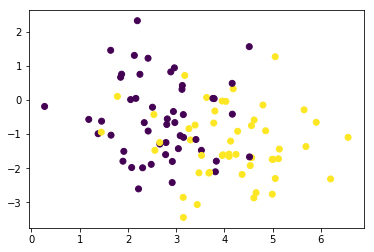

In [11]:
X, y = make_blobs(centers=2)
X = pd.DataFrame(X)

plt.scatter(X[0], X[1], c=y)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
lr.coef_, lr.intercept_

(array([[ 0.80246652, -0.37917171]]), array([-2.93750998]))

In [14]:
A = lr.coef_[0][0]
B = lr.coef_[0][1]
C = lr.intercept_

xx = np.linspace(min(X[0]), max(X[0]))
y_hat = lambda x: -A/B*x - C/B

In [15]:
X[2] = X[0]**2
X[3] = X[1]**2
X[4] = X[0]*X[1]

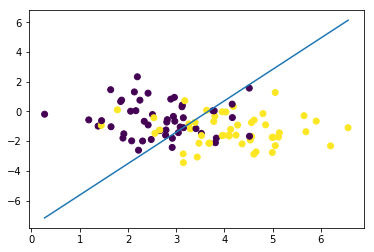

In [16]:
plt.scatter(X[0], X[1], c=y)
plt.plot(xx, y_hat(xx))

The goal with logistic regression is to find the line that "best splits" the data. 

You can imagine that one way to do this would be to have an equation of the form 

$$\widehat{y} = \beta_0 + \beta_1x$$

for one variable. If the equation returns a result greater then 0.5, we would call it class "1". It less than 0.5, class "2".


$$ \text{Class}(x) = \left\{
     \begin{array}{lr}
       1 & : \widehat{y} > 0.5\\
       0 & : \widehat{y} \leq 0.5
     \end{array}
   \right.
$$

This might look like

In [16]:
xx = np.linspace(-3,3, 1000)
y_hat = lambda x: 1 + 0.5*x
cls = lambda x: np.piecewise(x, [y_hat(x) > 0.5, y_hat(x) <= 0.5], [1, 0])

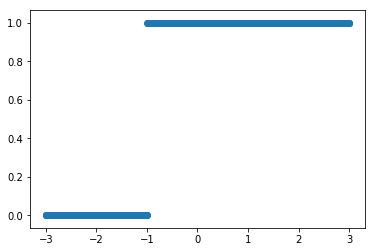

In [17]:
plt.scatter(xx, cls(xx))

There is an issue with this function in terms of our loss function. The most common loss function is 

$$\mathcal{L}(\beta) = \sum_{i=1}^n \left(y - \widehat{y}\right)^2 = (y-X\beta)^T(y-X\beta)$$

Here the possible value of $y$ are the possible classes, that is $y \in \{0,1\}$.

Here the possible value of $\widehat{y}$ are also the possible classes, that is $\widehat{y} \in \{0,1\}$.

The implications of this are that loss function is not continous and more importantly the derivative has points at which it is not defined. **We can not use calculus to solve this problem**.

This led to two innovations that are fundamental to modern machine learning (and especially deep learning):

1. the sigmoid
1. gradient descent

### The Sigmoid Function

The sigmoid function is a way to make the logistic regression equation continuous. Instead of

$$ \widehat{f}(x) = \left\{
     \begin{array}{lr}
       1 & : \beta_0 + \beta_1x > 0.5\\
       0 & : \beta_0 + \beta_1x \leq 0.5
     \end{array}
   \right.
$$

we use the sigmoid function 

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

to build our logistic regression function so that



$$ \widehat{f}(x) = \sigma(\beta_0 + \beta_1x) $$

The sigmoid function gets its name because it resembles an "s"

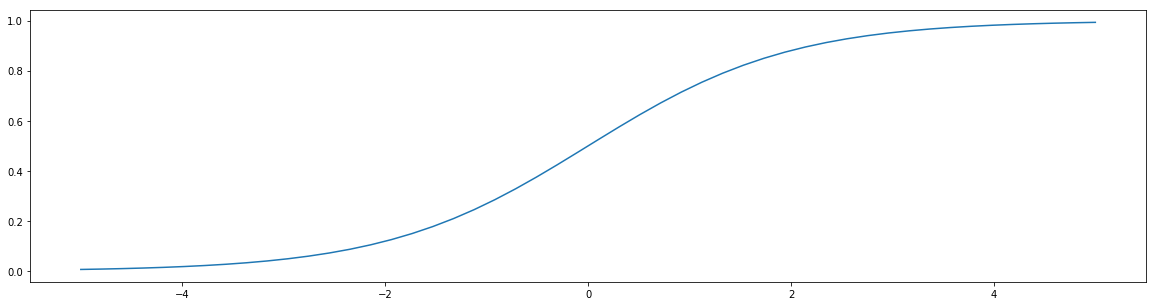

In [18]:
plt.figure(figsize=(20,5))
xx = np.linspace(-5, 5)
yy = 1/(1+np.exp(-xx))
plt.plot(xx, yy)

If $x$ is very large then $e^{-x}$ is very small and goes to zero, therefore, $\widehat{f}(x)$ is close to 1.

If $x$ is very small then $e^{-x}$ is very large and goes to infinity. Because $\frac{1}{\infty}\sim 0$, we can say that $\widehat{f}(x)$ is close to 0.

Note that if $x$ is zero, then $e^{-x}$ is 1 and therefore $\widehat{f}(x) = \frac{1}{2}$.

We interpret the output of the logistic function to be a probability that an input is a certain class. 

One additional point. We can think of this in terms of the following DAG:

<img src="https://www.evernote.com/l/AAE3uJCExaROCKiw2MGh6qZb6C6I8j397bsB/image.png" width=300px>

Although the logistic function is now continuous its non-linearity still makes it challenging to work with and in general we do not solve this by setting the derivative of the loss function to zero.

### Gradient Descent

The math behind gradient descent is extremely complicated. 

The algorithm begins by selecting $\beta$ values at random. The Data is passed through the pipeline to obtain the loss for the initial $\beta$ values. 

<img src="https://www.evernote.com/l/AAF5BGvPeBNMBox9FJiupRrV0ptrd9qlpxQB/image.png" width=400px>

Given the loss value, we are able to discern the direction in which we would need to update the $\beta$ values in order to improve the loss. The direction we need to travel in order to improve the loss is called the **gradient**. 

Recall that the shape of the loss is a paraboloid. We want to **descend** to the bottom of the loss paraboloid.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Paraboloid_of_Revolution.svg/512px-Paraboloid_of_Revolution.svg.png" width=200px>

To do this we repeatedly pass the known data through the pipeline descending one step at a time.

This generalizes to a more complex linear DAG via a process called error or **backward propagation**.

<img src="https://www.evernote.com/l/AAEbw-A7neVFMrX0jUwWViy3ugHFKKND9lkB/image.png" width=700px>

The backward propagation algorithm is the fundamental algorithm for the branch of machine learning known as **deep learning**.